In [3]:
import torch.optim
from torch import nn
import importlib

import my_modules.nsclc
import my_modules.nsclc.nsclc_dataset
import my_modules.custom_models.classifier_models
importlib.reload(my_modules.nsclc.nsclc_dataset)
from my_modules.nsclc.nsclc_dataset import NSCLCDataset
importlib.reload(my_modules.custom_models.classifier_models)
from my_modules.custom_models.classifier_models import *

Cache reset
Cache reset


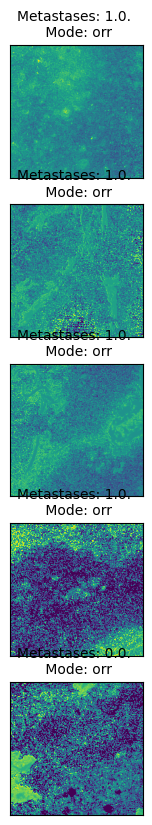

In [5]:
# Load dataset
data = NSCLCDataset('E:\\NSCLC Data - PMD', ['orr'], label='M', mask_on=False)
data.normalize_channels_to_max()
data.augment()
data.show_random()

In [6]:
from my_modules.model_learning import fold_cross_validate
from my_modules.model_learning.loader_maker import fold_augmented_data

# Image-base models
model_fns = [MLPNet, RegularizedMLPNet, ParallelMLPNet, RegularizedParallelMLPNet,
          CNNet, RegularizedCNNet, ParallelCNNet, RegularizedParallelCNNet]

# Create data loaders
data_folds = fold_augmented_data(data)

# Setup hyperparameters
batch_size = 32
learning_rate = 0.1
loss_fn = nn.BCELoss()
optimizer = [torch.optim.RMSprop, {'momentum': 0.9}]

# Iterate all models
for model_fn in model_fns:
    accuracy, running_loss, _  = fold_cross_validate(model_fn, data_folds, epochs=125, learning_rate=0.1, 
                                                     loss_fn=loss_fn, optimizer_fn=optimizer[0], **optimizer[1])

MLP Net accuracy for fold 1: 41.18%
MLP Net accuracy for fold 2: 58.82%
MLP Net accuracy for fold 3: 51.43%
MLP Net accuracy for fold 4: 61.76%
MLP Net accuracy for fold 5: 62.86%
>>>MLP Net average accuracy: 55.21%<<<
Regularized MLP Net accuracy for fold 1: 58.82%
Regularized MLP Net accuracy for fold 2: 41.18%
Regularized MLP Net accuracy for fold 3: 51.43%
Regularized MLP Net accuracy for fold 4: 61.76%
Regularized MLP Net accuracy for fold 5: 37.14%
>>>Regularized MLP Net average accuracy: 50.07%<<<
Parallel MLP accuracy for fold 1: 58.82%
Parallel MLP accuracy for fold 2: 58.82%
Parallel MLP accuracy for fold 3: 48.57%
Parallel MLP accuracy for fold 4: 61.76%
Parallel MLP accuracy for fold 5: 62.86%
>>>Parallel MLP average accuracy: 58.17%<<<
Regularized Parallel MLP Net accuracy for fold 1: 41.18%
Regularized Parallel MLP Net accuracy for fold 2: 58.82%
Regularized Parallel MLP Net accuracy for fold 3: 48.57%
Regularized Parallel MLP Net accuracy for fold 4: 38.24%
Regularized P

In [8]:
# Transform data to histograms
data.dist_transform(nbins=25)

# Histogram-based models
model_fns = [MLPNet, RegularizedMLPNet, ParallelMLPNet, RegularizedParallelMLPNet,
          RNNet, RegularizedRNNet, ParallelRNNet, RegularizedParallelRNNet]

# Create data loaders

# Iterate all models
for model_fn in model_fns:
    accuracy, running_loss, _  = fold_cross_validate(model_fn, data_folds, epochs=125, learning_rate=0.1, 
                                                     loss_fn=loss_fn, optimizer_fn=optimizer[0], **optimizer[1])

MLP Net accuracy for fold 1: 58.82%
MLP Net accuracy for fold 2: 58.82%
MLP Net accuracy for fold 3: 51.43%
MLP Net accuracy for fold 4: 61.76%
MLP Net accuracy for fold 5: 62.86%
>>>MLP Net average accuracy: 58.74%<<<
Regularized MLP Net accuracy for fold 1: 58.82%
Regularized MLP Net accuracy for fold 2: 58.82%
Regularized MLP Net accuracy for fold 3: 51.43%
Regularized MLP Net accuracy for fold 4: 38.24%
Regularized MLP Net accuracy for fold 5: 62.86%
>>>Regularized MLP Net average accuracy: 54.03%<<<
Parallel MLP accuracy for fold 1: 58.82%
Parallel MLP accuracy for fold 2: 58.82%
Parallel MLP accuracy for fold 3: 51.43%
Parallel MLP accuracy for fold 4: 61.76%
Parallel MLP accuracy for fold 5: 37.14%
>>>Parallel MLP average accuracy: 53.60%<<<
Regularized Parallel MLP Net accuracy for fold 1: 58.82%
Regularized Parallel MLP Net accuracy for fold 2: 58.82%
Regularized Parallel MLP Net accuracy for fold 3: 51.43%
Regularized Parallel MLP Net accuracy for fold 4: 61.76%
Regularized P

Cache reset
Cache reset


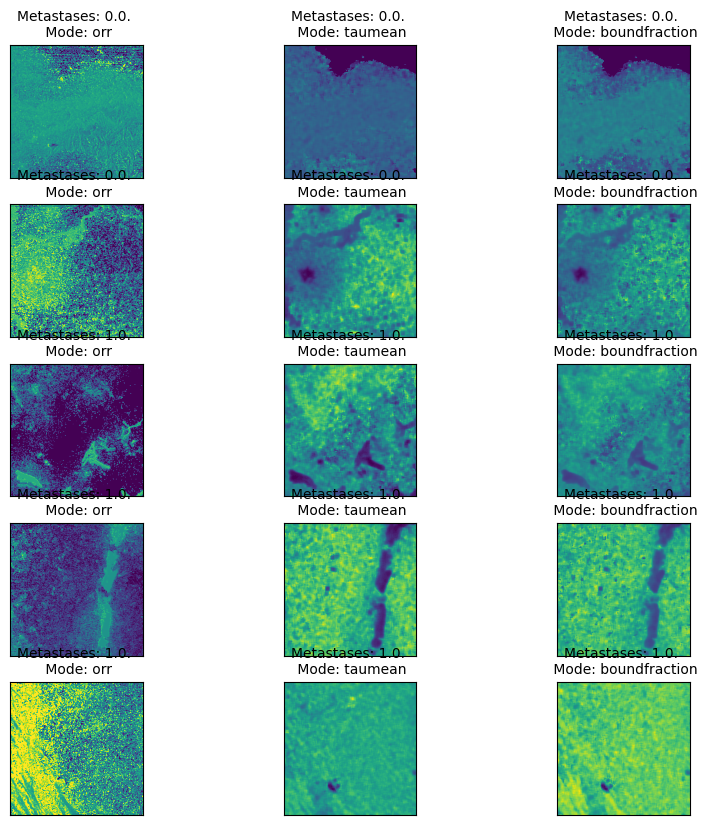

Cache reset
Cache reset


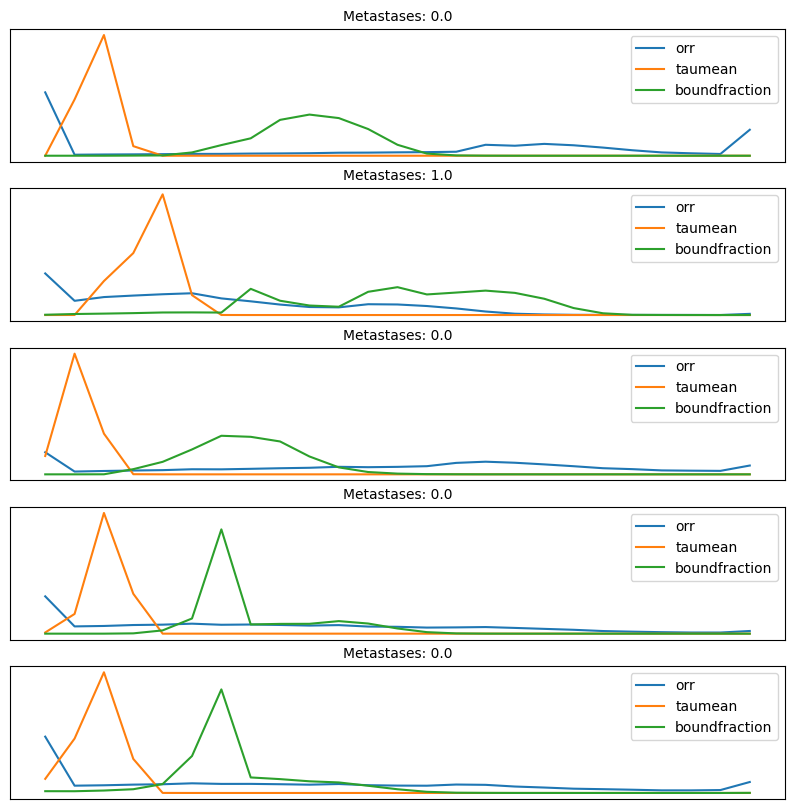

MLP Net accuracy for fold 1: 57.69%
MLP Net accuracy for fold 2: 44.44%
MLP Net accuracy for fold 3: 61.54%
MLP Net accuracy for fold 4: 59.26%
MLP Net accuracy for fold 5: 40.74%
>>>MLP Net average accuracy: 52.74%<<<
Regularized MLP Net accuracy for fold 1: 57.69%
Regularized MLP Net accuracy for fold 2: 44.44%
Regularized MLP Net accuracy for fold 3: 61.54%
Regularized MLP Net accuracy for fold 4: 59.26%
Regularized MLP Net accuracy for fold 5: 64.44%
>>>Regularized MLP Net average accuracy: 57.48%<<<
Parallel MLP accuracy for fold 1: 42.31%
Parallel MLP accuracy for fold 2: 55.56%
Parallel MLP accuracy for fold 3: 38.46%
Parallel MLP accuracy for fold 4: 40.74%
Parallel MLP accuracy for fold 5: 59.26%
>>>Parallel MLP average accuracy: 47.26%<<<
Regularized Parallel MLP Net accuracy for fold 1: 42.31%
Regularized Parallel MLP Net accuracy for fold 2: 44.44%
Regularized Parallel MLP Net accuracy for fold 3: 61.54%
Regularized Parallel MLP Net accuracy for fold 4: 59.26%
Regularized P

In [23]:
data.__init__(data.root, ['orr', 'taumean', 'boundfraction'], label=data.label, mask_on=data.mask_on, transforms=data.transforms, device=data.device)
data.normalize_channels_to_max()
data.augment()
data.show_random()
data.dist_transform(nbins=25)
data.show_random()
data_folds = fold_augmented_data(data)
for model_fn in model_fns:
    accuracy, running_loss, _  = fold_cross_validate(model_fn, data_folds, epochs=125, learning_rate=0.1, 
                                                     loss_fn=loss_fn, optimizer_fn=optimizer[0], **optimizer[1])

In [ ]:
for model_fn in model_fns:
    accuracy, running_loss, _  = fold_cross_validate(model_fn, data_folds, epochs=250, learning_rate=0.01, 
                                                     loss_fn=loss_fn, optimizer_fn=optimizer[0], **optimizer[1])